In [12]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Assignment Goal 

This project aims to create a Vector Space Model that predicts a user's preferred wedding gown based on their Wedding Related user data. The model will use document features such as wedding store items like wedding gowns, roses, diamond rings, or a combination of many such related items. 

In [13]:
sys.path.append('./src')
from load import load_metadata
from sample import preprocess_data
from explore import plot_data
from modify import transform_data
from model import calculate_similarity
from assess import get_top_similar

# Data Loading & Feature Engineering
 Constructing the Document Meta Dataframe
 The CSV file 'data/wedding_data.csv' should contain the metadata and content used in the src/main.py file to load the document data into the TF-IDF Vector Space "Wedding Gown" Model.

In [14]:
doc_df = load_metadata('./src/data')

## Data Processing

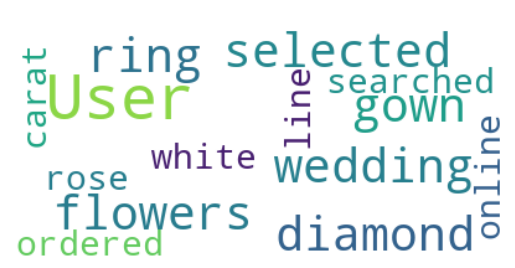

In [15]:
# Explore
plot_data(doc_df, 'content')

In [16]:
#preprocessing
doc_df = preprocess_data(doc_df)
doc_df

,filename,content
0,d4.txt,"User selected white wedding gown, online flowe..."
1,d1.txt,User selected Wedding gown.
2,d2.txt,User ordered on-line rose flowers.
3,d3.txt,User searched diamond ring.


In [17]:
# Modify
vectors, vectorizer = transform_data(doc_df, 'content')
vectors

      carat   diamond   flowers      gown      line        on    online  \
0  0.377914  0.297952  0.297952  0.297952  0.000000  0.000000  0.377914   
1  0.000000  0.000000  0.000000  0.539313  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.356389  0.000000  0.452035  0.452035  0.000000   
3  0.000000  0.497096  0.000000  0.000000  0.000000  0.000000  0.000000   

    ordered      ring      rose  searched  selected      user   wedding  \
0  0.000000  0.297952  0.000000  0.000000  0.297952  0.197211  0.297952   
1  0.000000  0.000000  0.000000  0.000000  0.539313  0.356966  0.539313   
2  0.452035  0.000000  0.452035  0.000000  0.000000  0.235891  0.000000   
3  0.000000  0.497096  0.000000  0.630504  0.000000  0.329023  0.000000   

      white  
0  0.377914  
1  0.000000  
2  0.000000  
3  0.000000  


<4x15 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [18]:
# Model (modeling the document's similarity) to 
# the 'gown', 'rose', 'diamond', 'flowers' vocab vector by using cosine similarity
# the cosine similarity matrix is calculated between the term vector
# and the document vector matrix
similarity_matrix = calculate_similarity(vectors, vectorizer, ['gown', 'rose', 'diamond', 'flowers'])
similarity_matrix

        gown      rose   diamond   flowers
0   0.483575  0.000000  0.514107  0.641404
1   0.248609  0.000000  1.000000  0.329750
2   0.310167  0.767204  0.329750  1.000000
3   1.000000  0.000000  0.248609  0.310167
4   0.000000  1.000000  0.000000  0.767204
5   0.000000  1.000000  0.000000  0.767204
6   0.483575  0.000000  0.514107  0.641404
7   0.000000  1.000000  0.000000  0.767204
8   0.248609  0.000000  1.000000  0.329750
9   0.000000  1.000000  0.000000  0.767204
10  0.000000  0.000000  0.857726  0.000000
11  1.000000  0.000000  0.248609  0.310167
12  0.709689  0.410498  0.667541  0.535057
13  1.000000  0.000000  0.248609  0.310167
14  0.483575  0.000000  0.514107  0.641404


array([[0.48357453, 0.24860923, 0.3101665 , 1.        , 0.        ,
        0.        , 0.48357453, 0.        , 0.24860923, 0.        ,
        0.        , 1.        , 0.70968918, 1.        , 0.48357453],
       [0.        , 0.        , 0.76720354, 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.4104977 , 0.        , 0.        ],
       [0.51410737, 1.        , 0.32975038, 0.24860923, 0.        ,
        0.        , 0.51410737, 0.        , 1.        , 0.        ,
        0.85772584, 0.24860923, 0.66754074, 0.24860923, 0.51410737],
       [0.64140372, 0.32975038, 1.        , 0.3101665 , 0.76720354,
        0.76720354, 0.64140372, 0.76720354, 0.32975038, 0.76720354,
        0.        , 0.3101665 , 0.5350571 , 0.3101665 , 0.64140372]])

In [19]:
# Assess (output of the documents similarity to the tfidf vector and the vocab vector)
top_similar = get_top_similar(similarity_matrix, 5)
print(top_similar)

[[ 3 11 13 12  0]
 [ 4  5  7  9  2]
 [ 1  8 10 12  0]
 [ 2  4  5  7  9]]


In [20]:
## Determining the most similar document to the vocab. vector key
# 'wedding gown', 'rose', 'diamond', 'flowers'
# the most similar document is the document with the highest similarity score
# Initialize an empty dictionary to store the results
top_similar_scores = {}

# Loop over the rows of the top_similar matrix
for i in range(top_similar.shape[0]):
    # Get the indices of the top 5 most similar documents for the i-th document
    top_similar_indices = top_similar[i]
    
    # Get the similarity scores for these documents
    similarity_scores = similarity_matrix[i, top_similar_indices]
    
    # Get the name of the i-th document
    doc_name = doc_df.iloc[i]['filename']  # replace 'document_name' with the actual column name
    
    # Store the results in the dictionary
    top_similar_scores[doc_name] = sum(similarity_scores)/len(similarity_scores)

In [21]:
top_similar_scores

{'d4.txt': 0.8386527425441119,
 'd1.txt': 0.9534407072385862,
 'd2.txt': 0.8078747898203981,
 'd3.txt': 0.8137628289543452}

In [25]:
similarity_to_vv = pd.DataFrame.from_dict(top_similar_scores, orient='index', columns=['similarity_score'])

In [27]:
similarity_to_vv.reset_index(inplace=True)
similarity_to_vv.rename(columns={'index':'filename'}, inplace=True)

In [31]:
# merge similarity_to_vv and doc_df on filename
doc_df = doc_df.merge(similarity_to_vv, on='filename')

# Conclusion
The document d1.txt was the most similar to the vocab. vector key
['wedding gown', 'rose', 'diamond', 'flowers']. This shows that this user is the most likely to have gone through the store and done the most specific search for wedding related items, especially the wedding gown. A close second is the document d4.txt, which has the almost all the vocab vector terms, however it might lack similarity due to having extraneous terms such as 'white', 'online', '3', 'carat', etc, that increase the vector size lowering the overall similarity due to the nature of tf-idf.

In [42]:
doc_df

,filename,content,similarity_score
0,d4.txt,"User selected white wedding gown, online flowe...",0.838653
1,d1.txt,User selected Wedding gown.,0.953441
2,d2.txt,User ordered on-line rose flowers.,0.807875
3,d3.txt,User searched diamond ring.,0.813763


In [33]:
doc_df.iloc[doc_df['similarity_score'].idxmax()]

filename                                 d1.txt
content             User selected Wedding gown.
similarity_score                       0.953441
Name: 1, dtype: object

In [41]:
doc_df.loc[0, ['similarity_score','content']]a

similarity_score                                             0.838653
content             User selected white wedding gown, online flowe...
Name: 0, dtype: object